## **Chapter02. 데이터와 표본분포 (68~109p)**

In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
LOANS_INCOME_CSV = 'loans_income.csv'
SP500_DATA_CSV = 'sp500_data.csv.gz'

### **Chapter02.01 임의표본추출과 표본편향(68p)**

* **모집단 (Population)**
  * 어떤 데이터 집합을 구성하는 ***전체 대상 혹은 전체 집합***
* **표본 (Sample)**
  * 더 큰 데이터 집합 (모집단)으로부터 얻은 ***부분집합***
* $N(n)$
  * 모집단 (표본)의 크기

* **임의표본추출 (랜덤표본추출, Random Sampling)**
  * 무작위로 표본을 추출하는 것
  * 각 추첨에서 모든 원소는 동일한 확률로 뽑힘
* **단순임의표본 (단순랜덤표본, Simple Random Sample)**
  * 임의표본추출 결과 얻은 샘플

* **층화표본추출 (Stratified Sampling)**
  * 모집단을 여러 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것
* **계층 (Stratum)**
  * 공통된 특징을 가진 모집단의 동종 하위 그룹

* **복원추출 (Sampling With Replacement)**
  * 추첨 후 다음번에도 중복 추출이 가능하도록 해당 샘플을 다시 모집단에 포함
* **비복원추출 (Sampling Without Replacement)**
  * 한 번 뽑힌 원소는 추후 추처에 사용하지 않음

* **편향 (Bias)**
  * 계통상의 오류
  * 측정 과정 혹은 표본추출 과정에서 발생하는 계통적인 오차를 의미
* **표본편향 (Sample Bias)**
  * 모집단을 잘못 대표하는 표본
* **비임의 (Nonrandom)**
  * 아무리 랜덤표본이라고 해도, ***어떤 표본도 모집단을 정확하게 대표할 수 없다***는 것을 의미

### **Chapter02.02 선택편향 (76p)**

* **선택편향 (Selection Bias)**
  * 데이터를 의식적이든 무의식적이든 선택적으로 고르는 관행을 의미
  * 관측 데이터를 선택하는 방식 때문에 생기는 편향

* **데이터 스누핑 (Data Snooping)**
  * 뭔가 흥미로운 것을 찾아 데이터를 광범위하게 살피는 것

* **방대한 검색 효과 (Vast Search Effect)**
  * 중복 데이터 모델링이나 너무 많은 예측변수를 고려하는 모델링에서 비롯되는 편향 혹은 비재현성

* **평균으로의 회귀 (Regression to the Mean)**
  * 주어진 어떤 변수를 연속적으로 측정했을 때 나타나는 현상
  * 예외적인 경우가 관찰되면 그다음에는 중간 정도의 경우가 관찰되는 경향

### **Chapter02.03 통계학에서의 표본분포 (79p)**

* **표본분포**
  * 하나의 동일한 모집단에서 얻은 여러 샘플에 대한 표본통계량의 분포
  * 고전 통계의 대부분은 ***작은 표본은 가지고 매우 큰 모집단을 추론***
  * **용어 정리**
    * **표본통계량 (Sample Statistic)** ➜ 더 큰 모집단에서 추출된 표본 데이터들로부터 얻은 측정 지표
    * **데이터 분포 (Data Distribution)** ➜ 어떤 데이터 집합에서의 각 개별 값의 도수분포
    * **표본분포 (Sampling Distribution)** ➜ 여러 표본들 혹은 재표본들로부터 얻은 표본통계량의 도수분포
    * **중심극한정리 (Center limit Theorem)** ➜ 표본크기가 커질수록 표본분포가 정규분포를 따르는 경향
    * **표준오차 (Standard Error)** ➜ 여러 표본들로부터 얻은 표본통계량의 변량 ***(개별 데이터 값들의 변량을 뜻하는 표준편차와 혼동 주의)***

* **중심극한정리**
  * 모집단이 정규분포가 아니더라도, 표본크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 여러 표본에서 추출한 평균은 종 모양의 정규곡선을 따름

* **표준오차**
  * 표본 측정 지표의 변동성을 측정
  * 통계에 대한 표본분포의 변동성을 한마디로 말해주는 단일 측정 지표
  * 표본 값들의 표준편차 $s$와 표본크기 $n$을 기반으로 한 통계량을 이용하여 추정 ➜ $SE = \frac{s}{\sqrt n}$
  * 표본크기가 커지면 표준오차는 줄어듬

In [11]:
# Squeeze() ➜ 차원 축소, 스칼라 변환
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000),
    'type' : 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _ in range(1000)],   # for _ in ➜ 인덱스 무시
    'type' : 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)],
    'type' : 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
27962,68500.0,Data
30999,65000.0,Data
24173,43000.0,Data
37569,150000.0,Data
16363,101000.0,Data


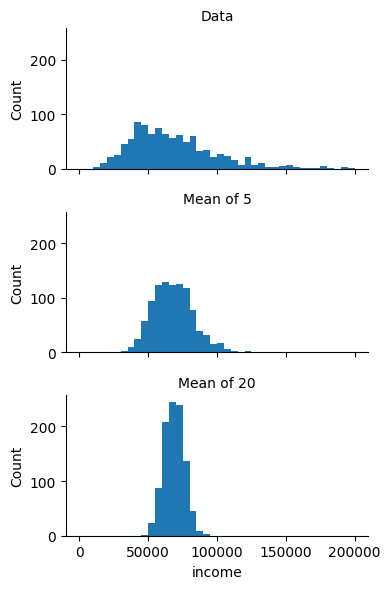

In [12]:
g = sns.FacetGrid(results, col = 'type', col_wrap = 1, height = 2, aspect = 2)
g.map(plt.hist, 'income', range = [0, 200000], bins = 40)
g.set_axis_labels('income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### **Chapter02.04 부트스트랩 (84p)**

* **부트스트랩 (BootStrap)**
  * 통계량이나 모델 파라미터의 표본분포를 추정하는 쉽고 효과적인 방법으로 ***현재 있는 표본에서 추가적으로 표본을 복원추출***하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것
  * 개념적으로 원래 표본을 수천, 수백만 번 복제하는 것
  * 모집단에서 추가적으로 표본을 뽑는다고 할 때, 그 표본이 얼마나 원래 표본과 비슷할지 알려주는 역활
  * 예측 모델을 적용할 때, ***여러 부트스트랩 표본들로부터 얻은 예측값들을 모아서 결론을 만드는 것 (배깅)***이 단일 모델을 사용하는 것보다 좋음

In [28]:
results = []
for nrepeat in range(1000):
    sample = resample('/content/loans_income.csv')
    sample = np.array(sample)
    results.append(np.median(sample))
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None

### **Chapter02.05 신뢰구간 (89p)**

* **신뢰수준 (Confidence Level)**
  * 같은 모집단으로부터 같은 방식으로 얻은, ***관심 통계량을 포함할 것으로 예상되는 신뢰구간의 백뷴율***
* **구간끝점**
  * 신뢰구간의 최상위, 최하위 끝점

68760.51844
55734.1


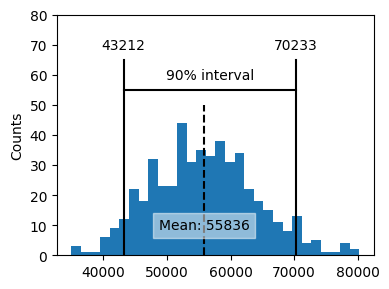

In [29]:
print(loans_income.mean())
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

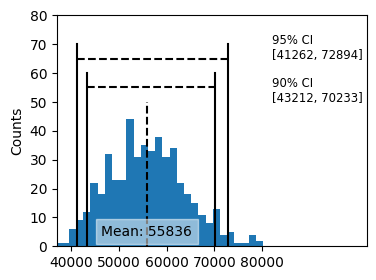

In [30]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50,
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65,
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

### **Chapter02.06 정규분포 (92p)**

* **정규분포 (Normal Distribution)**
  * 전통적인 통계의 상징

### **Chapter02.07 긴 꼬리 분포 (95p)**

### **Chapter02.08 스튜던트의 t 분포 (97p)**

### **Chapter02.09 이항분포 (100p)**

### **Chapter02.10 카이제곱분포 (102p)**

### **Chapter02.11 F 분포 (103p)**

### **Chapter02.12 푸아송 분포와 그 외 관련 분포들 (104p)**